# Looking at the identical resistance patterns

In [1]:
# generic import environment
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
print('versions')
print ('------------')
import pandas as pd
print('pandas: ', pd.__version__)

pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np
print('numpy: ', np.__version__)
# np.set_printoptions(suppress=False)

import time as time
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
print('mpl: ', mpl.__version__)
%matplotlib inline

versions
------------
pandas:  0.17.1
numpy:  1.10.4
mpl:  1.5.1


In [2]:
# load data
df = pd.read_csv('data/kmer_example.csv', sep='\t')
print(df.shape)

(999, 607)


In [3]:
# force convert R/S col's to int; check for erroneous data
for x in df.columns.values[1:]:
    df[x] = df[x].astype(int)

In [5]:
# simple function to determine string length
def str_length(s):
    return len(str(s))

### take duplicate resistance "patterns" and spot check nucoletiode sequences

In [16]:
# force convert R/S col's to int; check for erroneous data
for x in df.columns.values[1:]:
    df[x] = df[x].astype(str)

join_cols = df.columns.values[1:]

mapping_df = pd.DataFrame()

mapping_df['super_kmer'] = df[join_cols].apply(lambda x: ''.join(x), axis=1)

og_shape = df.shape[1]
new_shape = len(mapping_df['super_kmer'].unique())
print( og_shape, '|', new_shape, ' ==> ', np.round((1 - (float(new_shape)/float(og_shape))),4), '(%) of resistance "patterns" are duplicates' )

for x in df.columns.values[1:]:
    df[x] = df[x].astype(int)

607 | 548  ==>  0.0972 (%) of resistance "patterns" are duplicates


In [41]:
unique_resist_pattern_list = list(mapping_df.values)
count_iter = []
for x in unique_resist_pattern_list:
    count_iter.append(unique_resist_pattern_list.count(x))
print(max(count_iter))    

In [60]:
ctr_df = pd.DataFrame({'count':count_iter,'pattern':unique_resist_pattern_list})
ctr_df = ctr_df.sort_values(['count'],ascending=False)
ctr_df = ctr_df.reset_index(drop=True)
ctr_df['count'].unique()

array([158,  78,  23,  20,  13,  11,   9,   8,   7,   6,   5,   4,   3,
         2,   1])

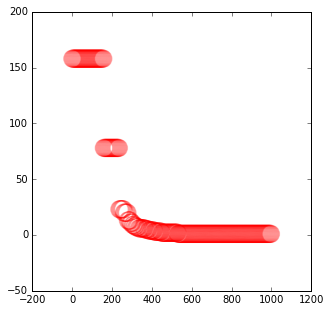

In [61]:
mpl.rc('figure', figsize=(5, 5))
XXX = ctr_df.index.values
YYY = ctr_df['count'].values

plt.scatter(XXX, YYY, s=300, facecolors='none', edgecolors='r',alpha=0.1)

In [ ]:
mapping_df['kmer'] = df['kmer']

##### all of these have an identical resistance pattern...

In [110]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[0])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAAGACATAATTAAAGCATATAT', 'AAAAAAAAGTAATTGCAGCTATTATTGG',
       'AAAAAAAATATCCACGAACCATGGTTGT', 'AAAAAAAATATGTTGCAGCACGCGCGAT',
       'AAAAAAAATGCTATTAATGATCTCGAAG', 'AAAAAAACAAATCGTACCTCAAATCACT',
       'AAAAAAACAACATCAAAAAAAAGAACAA', 'AAAAAAACAACATTAGATATCACTGGTA',
       'AAAAAAACAAGCAACTACCATTACGATA', 'AAAAAAACAATTGATTACAACAACTGAA',
       'AAAAAAACAATTGCACAGTATAAAAAGG', 'AAAAAAACACCAACAATTTTTATAAGAG',
       'AAAAAAACAGATGATGTTGAAATGACTT', 'AAAAAAACAGTAAGCCATTTAAATGACT',
       'AAAAAAACATGTATTGAATGGCGAGTTT', 'AAAAAAACATTCCCTGGATATGTTTTAG',
       'AAAAAAACCACCTTTTCTCTATATTTAC', 'AAAAAAACCTGAAAATGAGTTAATTAAA',
       'AAAAAAACGAACGTTAAACATGAATCAC', 'AAAAAAACGATCATGTTGTATTTGAGTA',
       'AAAAAAACGCACAACCATCCATAGGAAA', 'AAAAAAACGCCATCAACATCAAATAAAA',
       'AAAAAAACGCCATGCACTTGGTTGTTGT', 'AAAAAAACGCTGACTTACATCAGCGTTT',
       'AAAAAAACGTAATAAAGAAAATGCTGAT', 'AAAAAAACGTACAAAGTCAATTGCATAT',
       'AAAAAAACGTACATGTGTACCTACTTTG', 'AAAAAAACGTATTTTAAATGGGCAGAAA',
      

In [95]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[1])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAAATCAAATCCTGACTATTTAG', 'AAAAAAAATAAAATTTCTGGTTTTCAAT',
       'AAAAAAAATAATTCATGTATTAAAAAAA', 'AAAAAAAATCAAATCCTGACTATTTAGC',
       'AAAAAAAATCCCAGAAAATTAACACCTC', 'AAAAAAAATTGTAGAAGCTTGGCCAGCA',
       'AAAAAAACAATTTACTTTGACATGCTAT', 'AAAAAAACACCTCGACATAACTTCGAGG',
       'AAAAAAACACTCATTATTTCAATGGCCC', 'AAAAAAACAGTTATATATTTTTGTTAGA',
       'AAAAAAACATTAATTTCAAAGCGTATGC', 'AAAAAAACCCACTAACGAAATTATGAAA',
       'AAAAAAACGCGCCAATATAAAACCATTT', 'AAAAAAACTAAGCGTGCTGTTCGTGTCA',
       'AAAAAAACTCATAGCAATCTGTTGTCGG', 'AAAAAAAGAAACATTGATATCTCAGTTT',
       'AAAAAAAGAAAGGCACGATGTATAGAAC', 'AAAAAAAGAACCATTCTTTGGTGTTGCA',
       'AAAAAAAGATAACACTTATAAAATTCTA', 'AAAAAAAGATAATAATGAAGTGCGTATT',
       'AAAAAAAGATAGAAATACCCACTAAAAA', 'AAAAAAAGATCGCTGCCATTAAACGAAT',
       'AAAAAAAGCACTAAACTTTTAATGAAAT', 'AAAAAAAGCCAAGGCAACGGATGTTACC',
       'AAAAAAAGCCGAACAAATTATAGATTTT', 'AAAAAAAGCGATTCATCAGATGTCAAAA',
       'AAAAAAAGCTACATCAAAATTGAACAAA', 'AAAAAAAGCTTGTTACAAGCGTATTTTC',
      

In [96]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[2])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACATTTCTCATTTTCAAAATCA', 'AAAAAAACCTATAGATGCCATTAATGAT',
       'AAAAAAACGCATCACTGAGATTTTGATT', 'AAAAAAACGGCGTATGCTTATATGTAAG',
       'AAAAAAAGAGGCAACCGTCAGTAACAGT', 'AAAAAAAGGCCCAAAAAGATAAAAATAC',
       'AAAAAAATAATGCTTTTAATTGCAGTCA', 'AAAAAAATAATTGGGTTAATTTTATTAT',
       'AAAAAAATACAAAAATCTAACCTTCTTG', 'AAAAAAATACATCCATCGACAAGAACAA',
       'AAAAAAATAGCATAGAGTTATAAAAAAT', 'AAAAAAATAGCATTATATATAAATTCAA',
       'AAAAAAATGCTAATAAAAATAATTAATG', 'AAAAAAATGTTCATCAAAAGCAAAGGTT',
       'AAAAAAATTAACTGAACATTATGATGTA', 'AAAAAAATTAGAAAATAGATTATTTAAG',
       'AAAAAAATTAGTATCTACATCAGATACT', 'AAAAAAATTATCAAAATTTAAATTTTTG',
       'AAAAAAATTATGACCAAATAAGTTCTAT', 'AAAAAAATTTTGCTATCATAAATAACGT',
       'AAAAAACAAAATTCATTAGATTCAGTAG', 'AAAAAACAAATTTTTTAGGGGTAAACGG',
       'AAAAAACAACTAAAATAACTATCAATAG'], dtype=object)

In [97]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[3])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAATAGCTATTTTACCTCAATCA', 'AAAAAAAATCATCGTATCTCAGGATGAT',
       'AAAAAAACATTACCTACTACATTTGAAT', 'AAAAAAACCACCCATACGATTTTCAATA',
       'AAAAAAACGTTGAACTTTATTTAAAGGT', 'AAAAAAAGAAATGAAGTATTTCTGAAAA',
       'AAAAAAAGATAGTTATTTATGTGAATGG', 'AAAAAAAGGGTTGTCAGCGGGTCGAGTT',
       'AAAAAAAGTGGGCCCACGTTTGGGTGCC', 'AAAAAAATAACGAGTTACGAAAAAGTAA',
       'AAAAAAATAGCTATTTTACCTCAATCAC', 'AAAAAAATATAACTTATATTTATACTGA',
       'AAAAAAATCAAAAGACACAGCATATTTC', 'AAAAAAATCAGTCGGCAAAATCTCATTT',
       'AAAAAAATCATCGTATCTCAGGATGATA', 'AAAAAAATCCGCAATACAAATAAAGGTA',
       'AAAAAAATGCAAAATTAACTAATAAATT', 'AAAAAAATTATAATACTTCTAAAAATGA',
       'AAAAAACAAATCGTTTCTTCTTATTCGC', 'AAAAAACAACATGCGTGTGGAACCAATC'], dtype=object)

In [98]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[4])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAATCAAATCGTTTCGAGAGATA', 'AAAAAAACCTGTAATCTTCCGTGCTACA',
       'AAAAAAAGAACTAAGAGGTTGAGCTCTT', 'AAAAAAAGATAAGGCTGAAGAAAAGCGT',
       'AAAAAAAGATGAGCATCTACTGTCTCAT', 'AAAAAAAGATTATGCAGATATTAACTTT',
       'AAAAAAAGCTATTACGACTGGTTTTCTT', 'AAAAAAATAAATCCGCTATCTAAATGAC',
       'AAAAAAATAACGGTCTCATTTAAGAGAC', 'AAAAAAATATATAAGTCATTAACTGTCT',
       'AAAAAAATCAAATCGTTTCGAGAGATAC', 'AAAAAACAAAAAGAAAAAGTTAAGCCAA',
       'AAAAAACAAATAATGATGTTTCAACAAA'], dtype=object)

In [99]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[5])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACAAAAAATTAAACGGTATTGA', 'AAAAAAACTATAAAATTTTTCAAGTAAT',
       'AAAAAAAGACCTGACAAACATGAACGTT', 'AAAAAAAGCGATTAAAGCACAACAAGCA',
       'AAAAAAAGTATCGATAACCATATATTGG', 'AAAAAAATGATAAACACCAAACATCTGA',
       'AAAAAAATGTCAGAATACAAGAAAAAGA', 'AAAAAAATGTGCAAAATTACTTTTGCAC',
       'AAAAAAATTATGTATCTAAATCATATGC', 'AAAAAAATTCCCGAGCACTACAACAAGG',
       'AAAAAACAAAAAATTAAACGGTATTGAT'], dtype=object)

In [100]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[6])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACGCTCCCTCTCACAAATTCTG', 'AAAAAAACTTTTGAGTAATCGCAAGAAA',
       'AAAAAAAGGAACGCTACTTTGGCTAATG', 'AAAAAAATAACCTATGTTATAGATTATG',
       'AAAAAAATATTTGGTATTGAAATTAAAA', 'AAAAAAATCATCATTGCAATTCCAACTA',
       'AAAAAAATGACCAAGTTACCGGTCATAT', 'AAAAAAATGTTTGTAGAACATAAGGGTT',
       'AAAAAAATTTAGAGGTGATGTTATATGA'], dtype=object)

In [101]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[7])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAACTAATATATGTAGGCAAACT', 'AAAAAAACCTCGCAACGGTTAGTTAGCT',
       'AAAAAAACTAATATATGTAGGCAAACTA', 'AAAAAAAGAAATTGAAAGCTTTAAGTTT',
       'AAAAAAATATATTATTGAAACAACTTGA', 'AAAAAAATATCATTATTCTTTAATACTA',
       'AAAAAAATGTACATCAACATTCAGTACC', 'AAAAAAATGTAGAATAACATACAAAAAA'], dtype=object)

In [102]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[8])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAGAGGTGGATTCAATAAAATTA', 'AAAAAAAGCGCCAATACAGAACTTTAAT',
       'AAAAAAATATATTAAAAAGTGGTATTGC', 'AAAAAAATCATTCATGGTGAGGGCTTCA',
       'AAAAAAATCTTTGAATCGATTAACAGTC', 'AAAAAAATTTACTTATGTGCTCTACAAT',
       'AAAAAACAAAAAATCCCGCCCCTATACA'], dtype=object)

In [103]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[9])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAATAATATTTATATTTGTCGTA', 'AAAAAAAGGAAGTATTACGTATTTAAAA',
       'AAAAAAATAATATTTATATTTGTCGTAC', 'AAAAAAATACATGATTTAATTAGTGCTA',
       'AAAAAAATGAAACTTAAAAAAAATAATA', 'AAAAAAATTGATCGTGTGTTTTTAGAAC'], dtype=object)

In [105]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[10])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAAGCGCCTATGTCATGATTTAC', 'AAAAAAACCGTAATTTTAATGGGCGTGC',
       'AAAAAAAGCGCCTATGTCATGATTTACC', 'AAAAAAATAATATTCAACATAAGCACTT',
       'AAAAAAATTAGATAAAGAAGCGCTTTAC'], dtype=object)

In [106]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[11])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAAATTACTAGGGTAGCTAGTGAT', 'AAAAAAACCCTTACAACAAATATGTAAG',
       'AAAAAAAGACAGTTCAGATGGAAATAAA', 'AAAAAAATTACTAGGGTAGCTAGTGATA'], dtype=object)

In [107]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[12])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACATCGGATTTAATTTCAAGAT', 'AAAAAAACGCCATAGATTTTGGGGTGCA',
       'AAAAAAATTGCAGTAGTAGGTTATGGAT'], dtype=object)

In [108]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[13])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAACAAAAACAAAATTTAACTGAT', 'AAAAAACAAAAACAAAATTTAACTGATC'], dtype=object)

In [109]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[14])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
pd.Series(kmer_list_bunch).unique()

array(['AAAAAAATGTTTTTTCTTGATCTATAAC'], dtype=object)

## chunk search

In [116]:
xyz = ctr_df[(ctr_df['count']==ctr_df['count'].unique()[0])].iloc[0,:].values[1][0]
kmer_list_bunch = mapping_df[(mapping_df['super_kmer']==xyz)]['kmer'].values
top_bucket = pd.Series(kmer_list_bunch).unique()

In [136]:
def chunk_search(x,chunk_length=4):
    starting_pos = np.random.randint(len(x))
    if starting_pos > (len(x) - chunk_length):
        starting_pos = len(x) - chunk_length
    return x[starting_pos:(starting_pos+chunk_length)]

In [155]:
x = top_bucket[np.random.randint(len(top_bucket))]
chunk_search(x)

'TTTT'

In [181]:
chunk_set = set([])
for nuc_seq in top_bucket:
    for loop in range(0,2000):
        tmp_cnk = chunk_search(nuc_seq,chunk_length=28)
        chunk_set.add(tmp_cnk)

In [195]:
for uuu in range(1,(len(mapping_df['kmer'].values[5])+1)):
    chunk_set = set([])
    for nuc_seq in top_bucket:
        for loop in range(0,2000):
            tmp_cnk = chunk_search(nuc_seq,chunk_length=uuu)
            chunk_set.add(tmp_cnk)
    print(uuu, len(chunk_set))        

1 4
2 16
3 64
4 247
5 756
6 1531
7 2180
8 2493
9 2599
10 2630
11 2603
12 2520
13 2393
14 2255
15 2108
16 1958
17 1808
18 1658
19 1508
20 1358
21 1208
22 1058
23 908
24 758
25 608
26 458
27 308
28 158


####### todo: try bayesian approach | loop through chunk sizes and match with resistance pattern (x in kmer)